In [137]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings("ignore")
import xgboost as xgb

#### Dataset Visualization

In [115]:
df = pd.read_csv("PJME_hourly.csv", index_col="Datetime" )
df.index=pd.to_datetime(df.index)
df.index

DatetimeIndex(['2002-12-31 01:00:00', '2002-12-31 02:00:00',
               '2002-12-31 03:00:00', '2002-12-31 04:00:00',
               '2002-12-31 05:00:00', '2002-12-31 06:00:00',
               '2002-12-31 07:00:00', '2002-12-31 08:00:00',
               '2002-12-31 09:00:00', '2002-12-31 10:00:00',
               ...
               '2018-01-01 15:00:00', '2018-01-01 16:00:00',
               '2018-01-01 17:00:00', '2018-01-01 18:00:00',
               '2018-01-01 19:00:00', '2018-01-01 20:00:00',
               '2018-01-01 21:00:00', '2018-01-01 22:00:00',
               '2018-01-01 23:00:00', '2018-01-02 00:00:00'],
              dtype='datetime64[ns]', name='Datetime', length=145366, freq=None)

In [116]:
df.head()

,PJME_MW
Datetime,
2002-12-31 01:00:00,26498.0
2002-12-31 02:00:00,25147.0
2002-12-31 03:00:00,24574.0
2002-12-31 04:00:00,24393.0
2002-12-31 05:00:00,24860.0


In [117]:
df.tail()

,PJME_MW
Datetime,
2018-01-01 20:00:00,44284.0
2018-01-01 21:00:00,43751.0
2018-01-01 22:00:00,42402.0
2018-01-01 23:00:00,40164.0
2018-01-02 00:00:00,38608.0


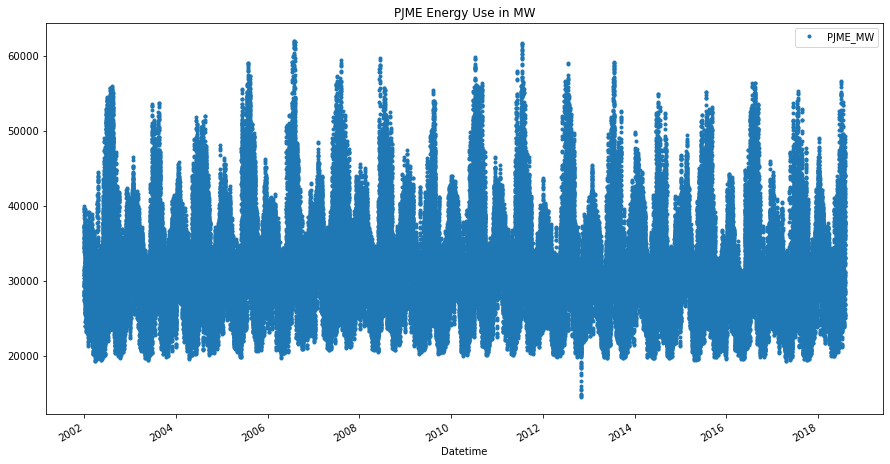

In [118]:
color_pal = sns.color_palette()
df.plot(style = ".", 
        figsize=(15,8), 
        title = "PJME Energy Use in MW", 
        color=color_pal[0])
plt.show()

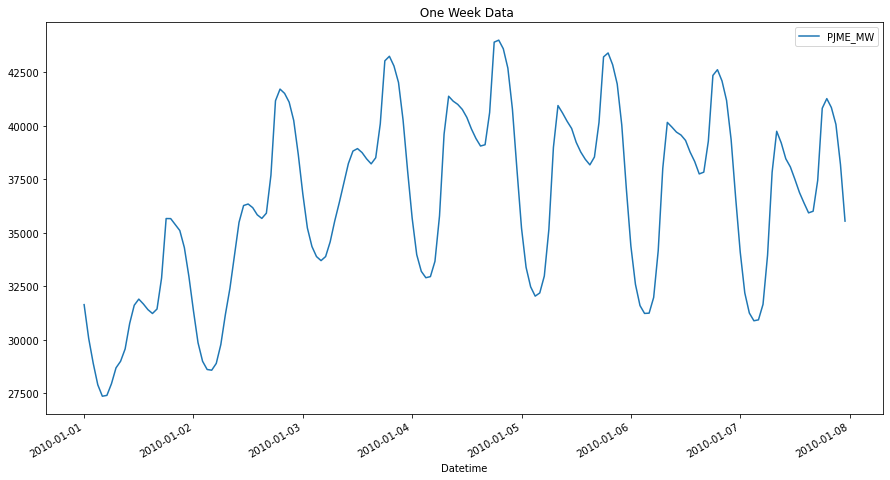

In [119]:
# Visualizing 1 week data

df.loc[(df.index >= "01-01-2010") & (df.index < "01-08-2010")].plot(figsize=(15,8), title = " One Week Data");

#### Train/Test Data Splitting

In [120]:
df_train = df.loc[df.index < "2015-01-01"]
df_test = df.loc[df.index >= "2015-01-01"]

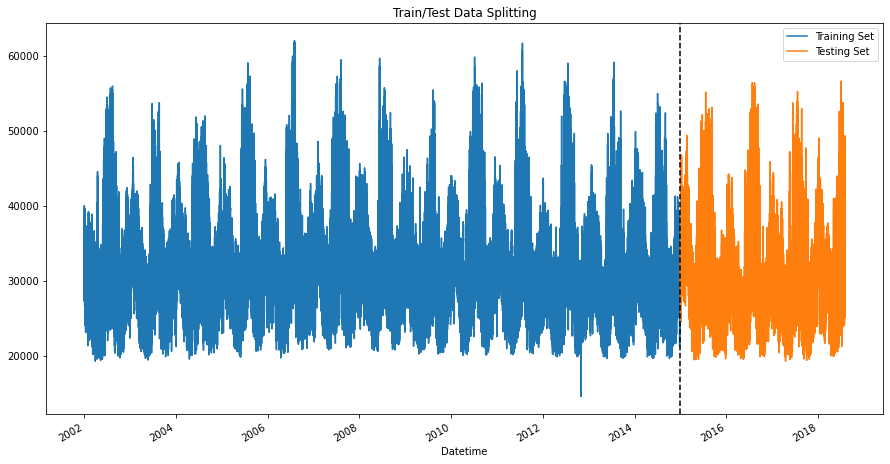

In [93]:
fig, ax = plt.subplots(figsize = (15,8))
df_train.plot(ax=ax, label = "Training Set", title = "Train/Test Data Splitting")
df_test.plot(ax=ax, label = "Testing Set")
ax.axvline("2015-01-01", color = "black", ls = "--" )
ax.legend(["Training Set", "Testing Set"])
plt.show()

#### Creating Features in Dataframe

In [121]:
def create_features(df):
    df["hour"]=df.index.hour
    df["dayofweek"]=df.index.day_of_week
    df["month"]=df.index.month
    df["quarter"]=df.index.quarter
    df["year"]=df.index.year
    df["dayofyear"]=df.index.day_of_year
    return df;

In [122]:
df=create_features(df)
df.head()

,PJME_MW,hour,dayofweek,month,quarter,year,dayofyear
Datetime,,,,,,,
2002-12-31 01:00:00,26498.0,1,1,12,4,2002,365
2002-12-31 02:00:00,25147.0,2,1,12,4,2002,365
2002-12-31 03:00:00,24574.0,3,1,12,4,2002,365
2002-12-31 04:00:00,24393.0,4,1,12,4,2002,365
2002-12-31 05:00:00,24860.0,5,1,12,4,2002,365


#### Visualizing Features to Target Relationship

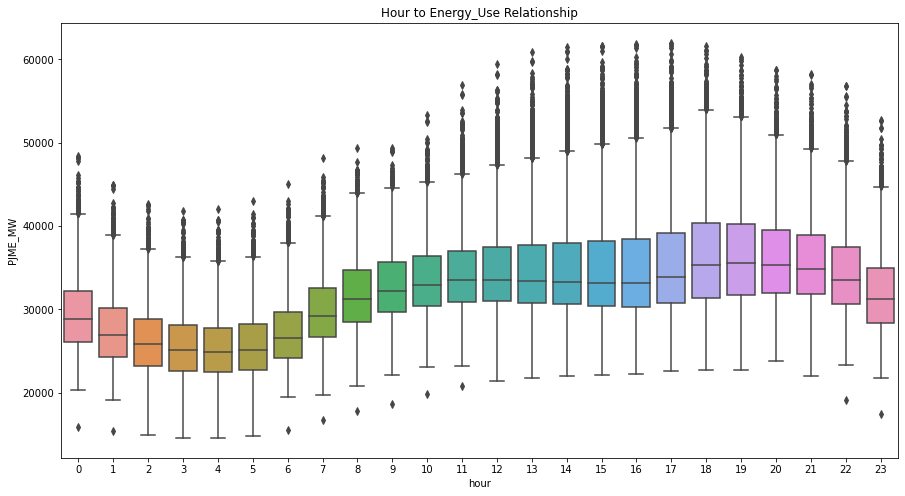

In [134]:
# By Hour

plt.figure(figsize =(15,8))
plt.title ("Hour to Energy_Use Relationship")
sns.boxplot(data=df, x="hour", y="PJME_MW", )
plt.show()

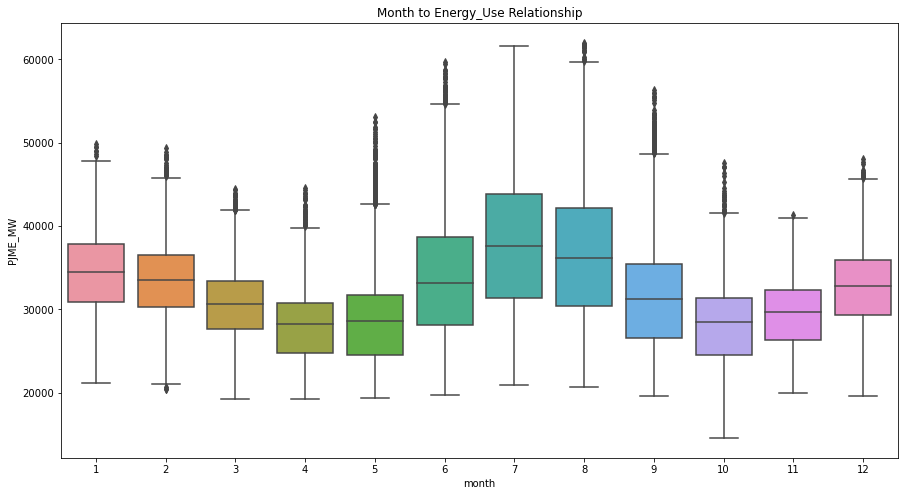

In [136]:
# By Month

plt.figure(figsize =(15,8))
plt.title ("Month to Energy_Use Relationship")
sns.boxplot(data=df, x="month", y="PJME_MW", )
plt.show()

#### Model Creation

In [138]:
df_train=create_features(df_train)
df_test=create_features(df_test)

In [139]:
df.columns

Index(['PJME_MW', 'hour', 'dayofweek', 'month', 'quarter', 'year',
       'dayofyear'],
      dtype='object')

In [143]:
Features = ['hour', 'dayofweek', 'month', 'quarter', 'year', 'dayofyear']
Target = "PJME_MW"

In [145]:
X_train = df_train[Features]
Y_train = df_train[Target]

X_test = df_test[Features]
Y_test = df_test[Target]

In [179]:
reg = xgb.XGBRegressor (n_estimators = 1000, early_stopping_rounds = 50)
reg.fit(X_train, Y_train,
       eval_set = [(X_train,Y_train),(X_test,Y_test)],
       verbose=True)

[0]	validation_0-rmse:23192.08347	validation_1-rmse:22262.72116
[1]	validation_0-rmse:16420.93235	validation_1-rmse:15523.28748
[2]	validation_0-rmse:11738.22738	validation_1-rmse:10902.11140
[3]	validation_0-rmse:8540.54141	validation_1-rmse:7809.80731
[4]	validation_0-rmse:6406.33278	validation_1-rmse:5886.97003
[5]	validation_0-rmse:5020.18414	validation_1-rmse:4712.54530
[6]	validation_0-rmse:4115.48568	validation_1-rmse:4193.11193
[7]	validation_0-rmse:3582.20742	validation_1-rmse:3953.68877
[8]	validation_0-rmse:3261.69940	validation_1-rmse:3796.80086
[9]	validation_0-rmse:3081.02460	validation_1-rmse:3777.59061
[10]	validation_0-rmse:2982.98557	validation_1-rmse:3763.35259
[11]	validation_0-rmse:2888.50281	validation_1-rmse:3809.64469
[12]	validation_0-rmse:2840.45869	validation_1-rmse:3810.92832
[13]	validation_0-rmse:2794.92469	validation_1-rmse:3833.23047
[14]	validation_0-rmse:2768.03577	validation_1-rmse:3826.84933
[15]	validation_0-rmse:2747.60912	validation_1-rmse:3839.80

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=50,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

Model is overfitting as rmse started increasing after certain level, so learning rate need to be added 

In [180]:
# Adjusting model parameters

reg = xgb.XGBRegressor (n_estimators = 1000, early_stopping_rounds = 50, learning_rate = 0.01)
reg.fit(X_train, Y_train,
       eval_set = [(X_train,Y_train),(X_test,Y_test)],
       verbose=100)

[0]	validation_0-rmse:32601.87826	validation_1-rmse:31654.28935
[100]	validation_0-rmse:12342.17856	validation_1-rmse:11516.21767
[200]	validation_0-rmse:5373.20460	validation_1-rmse:5164.97392
[300]	validation_0-rmse:3375.48321	validation_1-rmse:3834.00707
[400]	validation_0-rmse:2884.85132	validation_1-rmse:3716.33146
[450]	validation_0-rmse:2771.93085	validation_1-rmse:3730.77469


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=50,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

#### Checking Importance of Each Feature

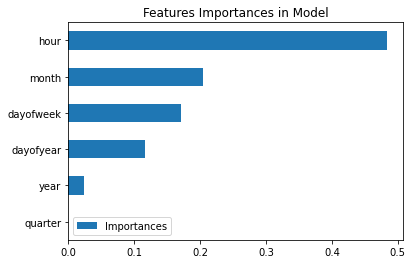

In [186]:
importance=pd.DataFrame(data=reg.feature_importances_,
                        index=reg.feature_names_in_,
                        columns=["Importances"])
importance=importance.sort_values("Importances")
importance.plot(kind="barh", title="Features Importances in Model");

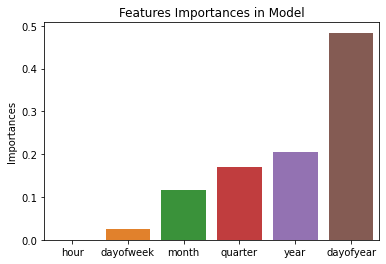

In [188]:
# plotting using seaborn

plt.figure()
plt.title ("Features Importances in Model")
sns.barplot(data=importance, x=importances.index, y="Importances")
plt.show()

#### Forcasting Test Data

In [191]:
df_test["Predictions"]=reg.predict(X_test)

In [192]:
df_test.head()

,PJME_MW,hour,dayofweek,month,quarter,year,dayofyear,Predictions
Datetime,,,,,,,,
2015-01-01 00:00:00,32802.0,0,3,1,1,2015,1,31861.591797
2015-12-31 01:00:00,24305.0,1,3,12,4,2015,365,28268.078125
2015-12-31 02:00:00,23156.0,2,3,12,4,2015,365,27164.314453
2015-12-31 03:00:00,22514.0,3,3,12,4,2015,365,26900.753906
2015-12-31 04:00:00,22330.0,4,3,12,4,2015,365,26900.753906


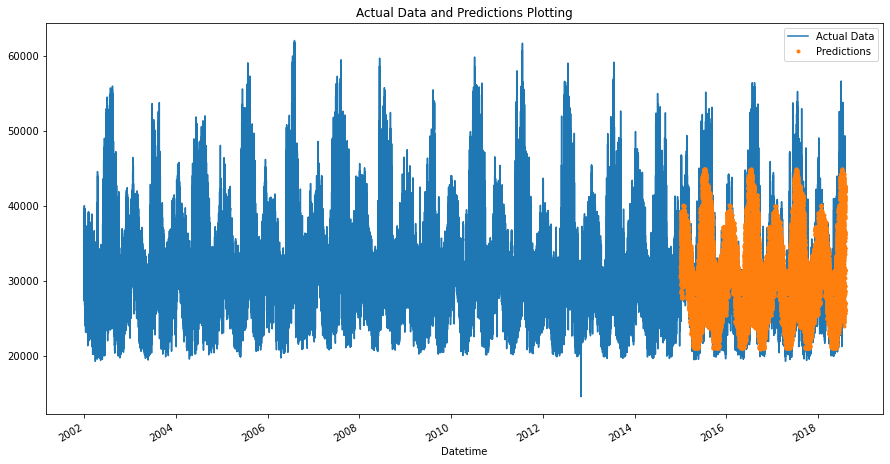

In [203]:
df = df.merge(df_test[["Predictions"]], how = "left", left_index=True, right_index=True)
ax=df[["PJME_MW"]].plot(figsize=(15,8))
df["Predictions"].plot(ax=ax, style=".")
plt.legend(["Actual Data","Predictions"])
ax.set_title("Actual Data and Predictions Plotting")
plt.show()

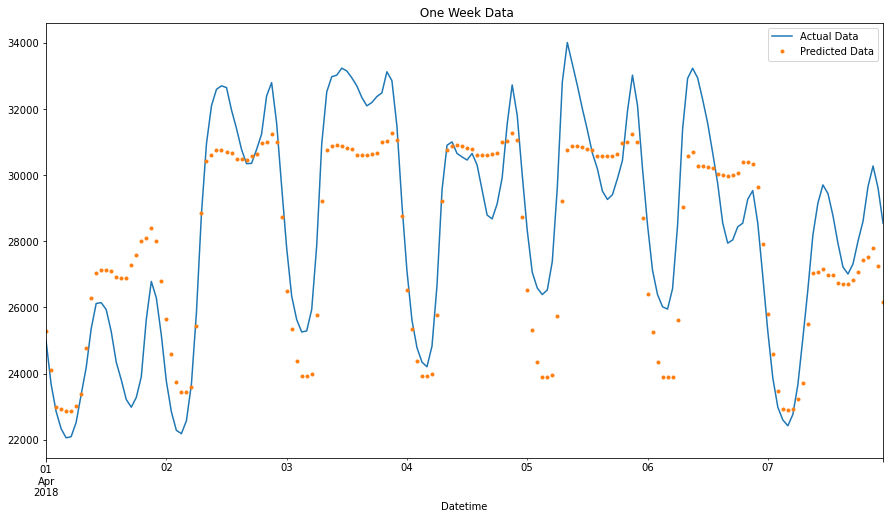

In [210]:
# Visualizing 1 week data

ax=df.loc[(df.index >= "04-01-2018") & (df.index < "04-08-2018")]["PJME_MW"].plot(figsize=(15,8), title = " One Week Data")
df.loc[(df.index >= "04-01-2018") & (df.index < "04-08-2018")]["Predictions"].plot(style=".");
plt.legend(["Actual Data",'Predicted Data'])
plt.show()

In [219]:
# Checking RMSE score value

error_score = np.sqrt(mean_squared_error(df_test["PJME_MW"], df_test["Predictions"]))
print (f"RMSE Score on Test_Set is: {error_score}")

RMSE Score on Test_Set is: 3715.9314164142415


In [224]:
# Checking error value

df_test["Error Value"] = np.abs(df_test[Target] - df_test["Predictions"])
df_test.head()

,PJME_MW,hour,dayofweek,month,quarter,year,dayofyear,Predictions,Error Value
Datetime,,,,,,,,,
2015-01-01 00:00:00,32802.0,0,3,1,1,2015,1,31861.591797,940.408203
2015-12-31 01:00:00,24305.0,1,3,12,4,2015,365,28268.078125,3963.078125
2015-12-31 02:00:00,23156.0,2,3,12,4,2015,365,27164.314453,4008.314453
2015-12-31 03:00:00,22514.0,3,3,12,4,2015,365,26900.753906,4386.753906
2015-12-31 04:00:00,22330.0,4,3,12,4,2015,365,26900.753906,4570.753906
